# Project 2- Customer_Churn

In [1]:
import pandas as pd

In [2]:
churn = pd.read_csv('/content/Customer_Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


#A.   Data Manipulation:


---


> a. Extract the 5th column & store it in ‘customer_5’

> b. Extract the 15th column & store it in ‘customer_15’

> c. Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

> d. Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

> e. Extract all the customers whose Contract is of two years, payment method is Mailed
check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
> f. Extract 333 random records from the customer_churndataframe& store the result in ‘customer_333’
> g. Get the count of different levels from the ‘Churn’ column

In [3]:
# a. Extract the 5th column & store it in ‘customer_5’
customer_5 = churn.iloc[:, 4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [4]:
# b. Extract the 15th column & store it in ‘customer_15’
customer_15 = churn.iloc[:, 14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [5]:
# c. Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’
senior_male_electronic = (churn['SeniorCitizen']== 1) & (churn.gender == 'Male' ) & (churn['PaymentMethod']== 'Electronic check')
senior_male_electronic.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [6]:
churn[senior_male_electronic].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [7]:
senior_male_electronic.value_counts()

False    6745
True      298
dtype: int64

In [8]:
# d. Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’
customer_total_tenure = (churn.tenure > 70) | (churn['MonthlyCharges'] > 100)
churn[customer_total_tenure].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [9]:
customer_total_tenure.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [10]:
customer_total_tenure.value_counts()

False    5784
True     1259
dtype: int64

In [11]:
# e. Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
two_mail_yes = (churn.Contract== 'Two year') & (churn['PaymentMethod']== 'Mailed check') & (churn['Churn']== 'Yes')
churn[two_mail_yes].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [12]:
two_mail_yes.value_counts()

False    7040
True        3
dtype: int64

In [13]:
# f. Extract 333 random records from the customer_churn dataframe & store the result in ‘customer_333’
customer_333 = churn.sample(n = 333)
#customer_333.info

In [14]:
# g. Get the count of different levels from the ‘Churn’ column
churn['Churn'].value_counts()
# churn.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# B) Data Visualization:

---
  a. Build a bar-plot for the ’InternetService’ column:
  
>    i. Set x-axis label to ‘Categories of Internet Service’

>    ii. Set y-axis label to ‘Count of Categories’

>    iii. Set the title of plot to be ‘Distribution of Internet Service’

>    iv. Set the color of the bars to be ‘orange’

In [15]:
import matplotlib.pyplot as plt
% matplotlib inline

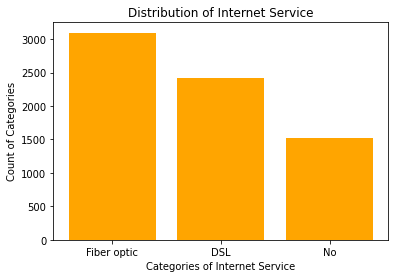

In [16]:
x = churn['InternetService'].value_counts().keys()
y = churn['InternetService'].value_counts()
plt.bar(x, y, color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

b. Build a histogram for the ‘tenure’ column:

 >   i. Set the number of bins to be 30
  
  >  ii. Set the color of the bins to be ‘green’
  
  >  iii. Assign the title ‘Distribution of tenure’

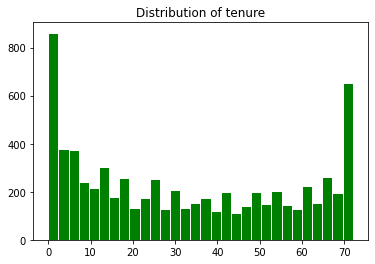

In [17]:
plt.hist(churn['tenure'], bins= 30, color = 'Green', edgecolor = 'w')
plt.title('Distribution of tenure')
plt.show()

  c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:

>    i. Assign the points a color of ‘brown’
 
 >   ii. Set the x-axis label to ‘Tenure of customer’
 
 >   iii. Set the y-axis label to ‘Monthly Charges of customer’
  
  >  iv. Set the title to ‘Tenure vs Monthly Charges’

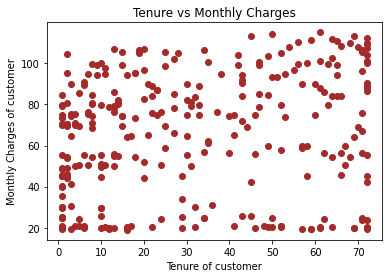

In [18]:
x = churn.tenure.head(300) 
y = churn.MonthlyCharges.head(300)
plt.scatter(x, y, color = 'brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

> d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


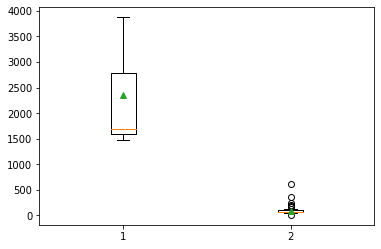

In [19]:
x = churn['Contract'].value_counts()
y = churn['tenure'].value_counts()

data = list([x,y])

plt.boxplot(data, showmeans = True)
plt.show()

# C) Linear Regression:

---

a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
  
  > i. Divide the dataset into train and test sets in 70:30 ratio.
  
  > ii. Build the model on train set and predict the values on test set
  
  > iii. After predicting the values, find the root mean square error
  
  > iv. Find out the error in prediction & store the result in ‘error’
  
  > v. Find the root mean square error

In [20]:
import pandas as pd

In [21]:
churn = pd.read_csv('/content/Customer_Churn.csv')

In [22]:
# dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
X = pd.DataFrame(churn['tenure'])
y = churn['MonthlyCharges']

In [23]:
# i. Divide the dataset into train and test sets in 70:30 ratio.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [24]:
#ii. Build the model on train set and predict the values on test set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
#iii. After predicting the values, find the root mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
mse

850.043757180835

In [27]:
# iv. Find out the error in prediction & store the result in ‘error’
error = y_pred - y_test
error
# error.mean()

3381   -12.334672
6180   -27.132562
4829    13.522880
3737     5.752289
4249    -7.997289
          ...    
3934    17.652711
1351    37.762796
2048   -35.486360
6218    18.107775
4297    -4.794335
Name: MonthlyCharges, Length: 2113, dtype: float64

In [28]:
# v. Find the root mean square error
import numpy as np
rmse = np.sqrt(mse)
rmse

29.15550989402921

# D) Logistic Regression:

---

a. Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’
  
  > i. Divide the dataset in 65:35 ratio.
  
  > ii. Build the model on train set and predict the values on test set.
  
  >iii. Build the confusion matrix and get the accuracy score.



In [29]:
import pandas as pd
churn = pd.read_csv('/content/Customer_Churn.csv')
churn.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [30]:
X = pd.DataFrame(churn['MonthlyCharges'])
y = churn['Churn']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1)

In [32]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = log_model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
confusion_matrix(y_pred, y_test)

array([[1840,  626],
       [   0,    0]])

In [36]:
accuracy_score(y_pred, y_test)

0.7461476074614761

b. Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’

  >i. Divide the dataset in 80:20 ratio.

  >ii. Build the model on train set and predict the values on test set.

  >iii. Build the confusion matrix and get the accuracy score.

In [49]:
X = churn.loc[:, ('tenure', 'MonthlyCharges')]
y = churn.Churn

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
from sklearn.linear_model import LogisticRegression
log2_model = LogisticRegression()
log2_model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = log2_model.predict(X_test)

In [54]:
import sklearn.metrics

In [55]:
confusion_matrix(y_pred , y_test)

array([[937, 199],
       [101, 172]])

In [56]:
accuracy_score(y_pred, y_test)

0.78708303761533

# E) Decision Tree:

---
  a. Build a decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’
  
  >i. Divide the dataset in 80:20 ratio
  
  >ii. Build the model on train set and predict the values on test set

  >iii. Build the confusion matrix and calculate the accuracy

In [57]:
import pandas as pd
churn = pd.read_csv('/content/Customer_Churn.csv')

In [70]:
X = pd.DataFrame(churn.loc[:, 'tenure'])
y = churn.loc[:, 'Churn']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [74]:
from sklearn.tree import DecisionTreeClassifier
DTC_model = DecisionTreeClassifier(min_samples_split=2)
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
y_pred = DTC_model.predict(X_test)

In [76]:
import sklearn.metrics

In [77]:
confusion_matrix(y_pred, y_test)

array([[983, 254],
       [ 78,  94]])

In [78]:
accuracy_score(y_pred, y_test)

0.7643718949609652

# F) Random Forest:
a. Build a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’
  >i. Divide the dataset in 70:30 ratio
  
  >ii. Build the model on train set and predict the values on test set
  
  >iii. Build the confusion matrix and calculate the accuracy

In [79]:
import pandas as pd
churn = pd.read_csv('/content/Customer_Churn.csv')

In [104]:
X = churn.loc[:, ('tenure', 'MonthlyCharges')]
y = churn.Churn
print(X)

      tenure  MonthlyCharges
0          1           29.85
1         34           56.95
2          2           53.85
3         45           42.30
4          2           70.70
...      ...             ...
7038      24           84.80
7039      72          103.20
7040      11           29.60
7041       4           74.40
7042      66          105.65

[7043 rows x 2 columns]


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [108]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
y_pred = RFmodel.predict(X_test)

In [109]:
import sklearn.metrics

In [113]:
confusion_matrix(y_pred, y_test)

array([[1358,  278],
       [ 227,  250]])

In [114]:
accuracy_score(y_pred, y_test)

0.7610033128253668